# Algoritmos

## Algoritmo IDE3


### Requisitos
Para el correcto funcionamiento del algoritmo será necesario instalar la librería networkx:

In [ ]:
pip install networkx

### Carga de datos
Cargaremos un fichero **.csv** con los datos necesarios para generar el arbol de decisión IDE3. La última columna del dataset será la seleccionada para determinar la clase a la que pertenece cada ejemplo.

In [1]:
import pandas as pd
dataset = pd.read_csv('examples_datasets/dataset_ide3_1.csv')
dataset

,Antenas,Colas,Núcleos,Cuerpo,Clase
0,1,0,2,Rayado,Normal
1,1,0,1,Blanco,Cancerígena
2,1,2,0,Rayado,Normal
3,0,2,1,Rayado,Normal
4,1,1,1,Rayado,Cancerígena
5,2,2,1,Rayado,Cancerígena


### Uso del algoritmo
Importa la clase **algoritmo** del modulo **ide3.py**. Llamamos al método **generate_tree()**, y le pasamos el dataset previamente cargado para generar el árbol. Además, especificaremos si queremos mostrar todos los cálculos realizados por el algoritmo:

In [2]:
from algorithms import ide3
alg = ide3.algorithm()
show = True
alg.generate_tree(dataset, show)

========== Decision Table 1 ==========
----------------------------------------------
|  Antenas Colas Núcleos  Cuerpo        Clase|
----------------------------------------------
|0       1     0       2  Rayado       Normal|
|1       1     0       1  Blanco  Cancerígena|
|2       1     2       0  Rayado       Normal|
|3       0     2       1  Rayado       Normal|
|4       1     1       1  Rayado  Cancerígena|
|5       2     2       1  Rayado  Cancerígena|
----------------------------------------------
We must calculate earnings of all attributes from table 1
I(Antenas) = I_1  + I_0 + I_2
I(Antenas) --------------------------------
	Entropy Attribute value: 1 - We must calculate his entropy
	I_1_Normal = (-1)*(2/4)*log2(2/4) = 0.5
	I_1_Cancerígena = (-1)*(2/4)*log2(2/4) = 0.5
	I_1 = I_1_Normal + I_1_Cancerígena = 1.0
I(Antenas) = 0 + (4/6) * I_1 = 0 + 1.0 = 0.6667
	Entropy Attribute value: 0 - We must calculate his entropy
	I_0_Normal = (-1)*(1/1)*log2(1/1) = -0.0
	I_0_Cancerígena = (

Podemos representar el árbol de decisión invocando al método **draw_tree()** de la clase.

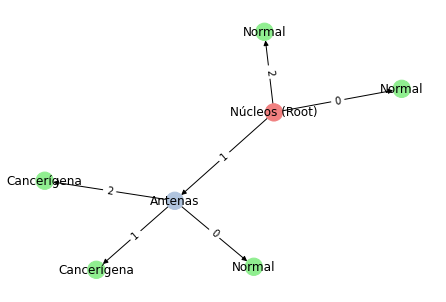

In [8]:
alg.draw_tree()

Para clasificar nuevos ejemplos, cargamos un nuevo dataset que solo contenga los atributos utilizados para generar el árbol de decisión (en este ejemplo, los atributos son: ['Antenas', 'Colas', 'Núcleos', 'Cuerpo']).

In [4]:
dataset_test = pd.read_csv('examples_datasets/dataset_ide3_test.csv')
dataset_test

,Antenas,Colas,Núcleos,Cuerpo
0,1,0,2,Rayado
1,1,1,1,Blanco
2,1,2,0,Blanco
3,0,1,1,Rayado


Ahora, utilizamos el método **predict()** de la clase para clasificar los nuevos ejemplos. El método nos devolverá un nuevo dataset con los ejemplos ya clasificados.

In [5]:
alg.predict(dataset_test)

,Antenas,Colas,Núcleos,Cuerpo,Clase
0,1,0,2,Rayado,Normal
1,1,1,1,Blanco,Cancerígena
2,1,2,0,Blanco,Normal
3,0,1,1,Rayado,Normal


## Regresión lineal

### Carga de datos
Cargaremos un fichero **.csv** con los datos necesarios para calcular la recta de regresión o aplicar el algoritmo de descenso por gradiente. El dataset debe tener dos columnas, una para los valores de 'x' y otro para los de 'y'.

In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv("examples_datasets/dataset_lineal_regresion_1.csv")
dataset

,x,y
0,1,1.5
1,2,2.0
2,3,2.5
3,4,4.0


### Uso del algoritmo
Importa la clase **algoritmo** del modulo **lineal_regresion.py**. Ahora tenemos distintas funcionalidades disponibles. Podemos representar el conjunto de datos:

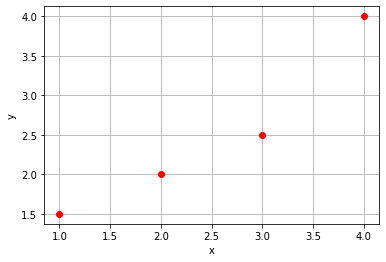

In [2]:
from algorithms import lineal_regresion
lr = lineal_regresion.algorithm()
lr.represent_dataset(dataset)

Para calcular los valores de theta en la recta de regresión, primero preparamos el dataset. Y después le pasamos los datos la función **calculate_theta()**

In [3]:
show = True
X, Y = lr.prepare_dataset(dataset)
theta = lr.calculate_theta(X, Y, show)

-------------- Formulas --------------
Θ = inv(X_t * X) * X_t * Y
--------------------------------------

A = X_t * X = [4.0 10.0]
              [10.0 30.0]

-----------inv(A)-----------
inv(A) = (1/det(A)) * Cofactor(A_t)

A = [a b] | det(A) = a*d - b*c = 4.0*30.0 - 10.0*10.0 = 20.0
    [c d]

A_t = [4.0 10.0]
      [10.0 30.0]

Cof(A_t) = [d -c] = [30.0 -10.0]
           [-b a]   [-10.0 4.0]

inv(A) = 1/20.0 * [30.0 -10.0] = [1.5 -0.5]
                  [-10.0 4.0]    [-0.5 0.2]
----------------------------
Θ = inv(A) * X_t * Y = B * Y

B = inv(A) * X_t = 
[[ 1.   0.5  0.  -0.5]
 [-0.3 -0.1  0.1  0.3]]

Θ = B * Y

Θ = [0.5 0.8]


Con los valores de theta ya calculados, podemos **representar** la recta junto a los datos con la función **represent_regresion()**

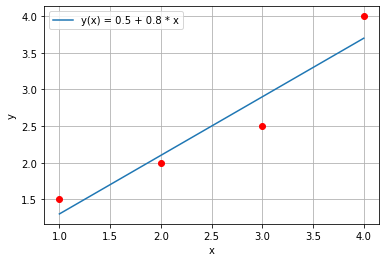

In [4]:
lr.represent_regresion(dataset, theta)

Y además, podemos **calcular un nuevo valor de x**

In [6]:
show = True
x = 5.5
y = lr.y(theta, x, show)

y(5.5) = 0.5 + 0.8 * 5.5 = 4.9


Para calcular el valor de la función de costo para un determinado valor theta, utilizaremos la función **lost_function()**. En este caso, calcularemos su valor cuando __θ_0 = 3__ y cuando __θ_1 = 1__.

In [7]:
show = True
theta = np.array([3, 1])
lost = lr.lost_function(X, Y, theta, show)

-------------- Formulas --------------
J(Θ) = (1/2) * SUM_j_to_m[ (h_theta(x_j) - y_j)^2 ]
hθ(x) = SUM_j_to_m[ x_j *  θ_j]
--------------------------------------

J(Θ) = (1/2) * [([1.0*3 + 1.01] - 1.5)^2 + ([1.0*3 + 2.01] - 2.0)^2 + ([1.0*3 + 3.01] - 2.5)^2 + ([1.0*3 + 4.01] - 4.0)^2 ]
J(Θ) = (1/2) * [6.25 + 9.0 + 12.25 + 9.0] = 18.25

J(Θ) = 18.25


Para realizar el **descenso por gradiente** usaremos la función **gradient_descent()**. Además, de los datos comentandos previamente. Deberemos especificar el **número de iteraciones** a realizar por el algoritmo y el factor de aprendizaje **alpha**.

In [8]:
n_iterations = 1 # Numero de iteraciones
alpha = 0.1 # Factor de aprendizaje
theta_prima = lr.gradient_descent(X, Y, theta, alpha, n_iterations, show)

-------------- Formulas --------------
θj' = θj + α * Σ_i_to_m[ (h_θ(x_i) - y_i) * x_ij ]
--------------------------------------

-------------- Iteration 1 --------------
θ0' = θ0 + (0.1)[ ([1.0*3 + 1.0*1] - 1.5) * 1.0  + ([1.0*3 + 2.0*1] - 1.5) * 1.0  + ([1.0*3 + 3.0*1] - 1.5) * 1.0  + ([1.0*3 + 4.0*1] - 1.5) * 1.0 ]
θ0' = θ0 + (0.1)[ 2.5 + 3.0  + 3.5  + 3.0 ] = 4.2

θ1' = θ1 + (0.1)[ ([1.0*3 + 1.0*1] - 2.0) * 1.0  + ([1.0*3 + 2.0*1] - 2.0) * 2.0  + ([1.0*3 + 3.0*1] - 2.0) * 3.0  + ([1.0*3 + 4.0*1] - 2.0) * 4.0 ]
θ1' = θ1 + (0.1)[ 2.5 + 6.0  + 10.5  + 12.0 ] = 4.1

[θ0, θ1] = [4.2, 4.1]



Y como hicimos anteriormente, también podemos representar los datos para los nuevos valores de theta

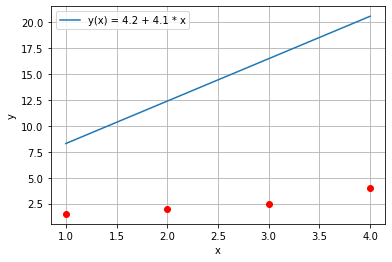

In [9]:
lr.represent_regresion(dataset, theta_prima)